In [58]:
import db_connect
import pandas
import matplotlib.pyplot as plt   # 資料視覺化套件
import matplotlib

In [59]:
# 建立與MySQL的連線
my_connt_obj = db_connect.mysql_connect()
conn = my_connt_obj.connect()

In [60]:
# 取得加權指數的資料
df_taiex = pandas.read_sql("SELECT * FROM StockTransactionInfo WHERE TradeDate >'2021-01-01'", con=conn)
# 檢查取得的資料
"""這樣只會顯示最後一個呼叫的資料，所以看不到.head()
df.head()   # 檢查頭五筆資料
df.tail()   # 檢查後五筆資料
"""
print(df_taiex.head() )
print(df_taiex.tail() )

    TradeDate  TranscationQty  TranscationAmount  TranscationCount     Taiex  \
0  2021-01-04      9339297176       349548269131           2722333  14902.03   
1  2021-01-05      9179847742       350088920543           2734498  15000.03   
2  2021-01-06     11485851750       438656275380           3414581  14983.13   
3  2021-01-07      8827119922       342426405710           2510944  15214.00   
4  2021-01-08      9249546443       400844785586           2700784  15463.95   

   ChangePoint          CreateTime  
0       169.50 2021-09-13 22:57:52  
1        98.00 2021-09-13 22:57:52  
2       -16.90 2021-09-13 22:57:52  
3       230.87 2021-09-13 22:57:52  
4       249.95 2021-09-13 22:57:52  
      TradeDate  TranscationQty  TranscationAmount  TranscationCount  \
166  2021-09-09      5177907252       246914721428           1644144   
167  2021-09-10      5898868907       268550691237           1765201   
168  2021-09-13      5932740401       260743193791           1837328   
169  2021

In [61]:
# 取得台積電的資料
df_2330 = pandas.read_sql("SELECT * FROM DailyPrice WHERE Symbol ='2330' and TradeDate > '2021-01-01';", con=conn)
# 檢查取得的資料
"""這樣只會顯示最後一個呼叫的資料，所以看不到.head()
df.head()   # 檢查頭五筆資料
df.tail()   # 檢查後五筆資料
"""
print(df_2330.head() )
print(df_2330.tail() )

     ID   TradeDate StockID Symbol  OpenPrice  HighPrice  LowPrice  \
0  4632  2021-09-01    None   2330      614.0      614.0     608.0   
1  4633  2021-09-02    None   2330      613.0      615.0     607.0   
2  4634  2021-09-03    None   2330      610.0      620.0     610.0   
3  4635  2021-09-06    None   2330      623.0      638.0     621.0   
4  4636  2021-09-07    None   2330      634.0      634.0     623.0   

   ClosePrice    Volumn          CreateTime  
0       613.0  31242788 2021-09-14 23:00:46  
1       607.0  26715492 2021-09-14 23:00:48  
2       620.0  53915006 2021-09-14 23:00:48  
3       631.0  59223061 2021-09-14 23:00:48  
4       623.0  27422775 2021-09-14 23:00:48  
       ID   TradeDate StockID Symbol  OpenPrice  HighPrice  LowPrice  \
166  4809  2021-08-27    None   2330      596.0      600.0     593.0   
167  4810  2021-08-30    None   2330      602.0      605.0     599.0   
168  4811  2021-08-31    None   2330      604.0      614.0     598.0   
169  5243  2021

In [62]:
# 關閉連線
# conn.close() 

[]

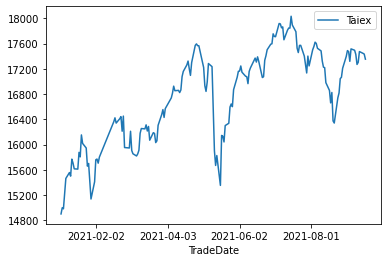

In [64]:
# 加權指數畫圖
df_taiex.plot(x="TradeDate", y="Taiex")
ax = plt.gca()
# 設定Ｘ軸刻度
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
# 設定y軸刻度
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))
plt.plot()

[]

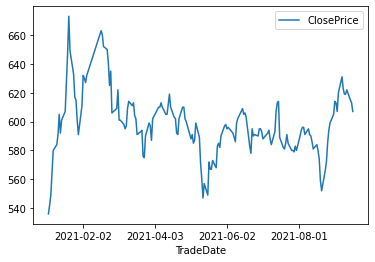

In [ ]:
# 台積電畫圖
df_2330.plot(x="TradeDate", y="ClosePrice")
ax = plt.gca()
# 設定Ｘ軸刻度
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
# 設定y軸刻度
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))
plt.plot()

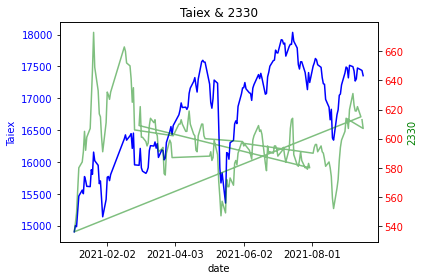

In [70]:
# 畫圖
# 在畫圖的地方，無法寫中文的名稱
fig, ax1 = plt.subplots()
plt.title("Taiex & 2330")
plt.xlabel("date")
ax2 = ax1.twinx()

# 製作第一個圖表：折線圖
# blue：表示藍色，可以用「b」表示
ax1.set_ylabel("Taiex", color="blue")
ax1.plot(df_taiex["TradeDate"], df_taiex["Taiex"], color="blue", alpha=1)
ax1.tick_params(axis="y", labelcolor="blue")

# 製作第二個圖表：折線圖
ax2.set_ylabel("2330", color="green")
ax2.plot(df_2330["TradeDate"], df_2330["ClosePrice"], color="green", alpha=0.5) # alpha: 增加透明度
ax2.tick_params(axis="y", labelcolor="r")

# 設定Ｘ軸刻度
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
# 設定y軸刻度
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))

fig.tight_layout()
plt.show()